# I. Introduction
- Name: Nurvita Aisah
- Batch: FTDS 007
## I.1. Dataset's Outline
Dataset is a crowdfunding data collection in 2018 which encompassed various categories.

The features of dataset consist of:
- ID: ID for each crowdfunding.
- name: name of crowdfunding project.
- category: category of crowdfunding project.
- main_category: main category of crowdfunding project.
- currency: the currency which was used in crowdfunding. 
- deadline: the deadline of each crowdfunding project. 
- goal: the funding target of each crowdfunding project. 
- launched: the launch date of a crowdfunding project.
- pledged: the pledge of funding was received. 
- state: the status of a crowdfunding project.
- backers: the number of donors of each crowdfunding project.
- country: the country in which crowdfunding was held.
- usd pledged: conversion in US dollars of the pledged column (conversion done by kickstarter).
- usd_pledged_real:  conversion in US dollars of the pledged column (conversion from Fixer.io API).
- usd_goal_real: conversion in US dollars of the goal column (conversion from Fixer.io API).

## I.2. Assignment Objectives
- Mampu memuat data dengan Pandas
- Mampu menangani missing values pada dataset
- Mampu melakukan manipulasi kolom
- Mampu membuat query terhadap dataset
- Mampu melakukan grouping terhadap dataset
- Mampu melakukan visualisasi sederhana menggunakan Pandas

# II. Import Libraries

In [1]:
import pandas as pd 
import numpy as np 
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

# III. Data Loading

Open the dataset

In [2]:
df = pd.read_csv("ks-projects-201801.csv") 

df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


Checking dataset attributes

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


Checking dataset dimension

In [4]:
df.shape

(378661, 15)

Checking the missing data

In [5]:
df.isnull().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

Checking the statistical description of dataset

In [6]:
df.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


# IV. Data Cleaning

Copying the dataset

In [7]:
df_new = df.copy()

Dropping the missing data

In [8]:
df_clean = df_new.dropna()

Checking the dataset after dropping the missing data

In [9]:
df_clean.isnull().sum()

ID                  0
name                0
category            0
main_category       0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd pledged         0
usd_pledged_real    0
usd_goal_real       0
dtype: int64

Renaming the column "usd pledged" into "usd_pledged" to remove the space in order to simplify the data processing

In [10]:
df_clean = df_clean.rename(
    columns={'usd pledged': 'usd_pledged'})

df_clean.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd_pledged', 'usd_pledged_real', 'usd_goal_real'],
      dtype='object')

# V. Data Exporation

The main category of crowdfunding and the total of category respectively

In [11]:
main_cat = df_clean['main_category'].value_counts()
main_cat

Film & Video    62696
Music           49530
Publishing      39379
Games           35225
Technology      32562
Design          30066
Art             28152
Food            24599
Fashion         22812
Theater         10912
Comics          10819
Photography     10778
Crafts           8809
Journalism       4754
Dance            3767
Name: main_category, dtype: int64

Plotting the percentage of Crownfunding Main Category

<AxesSubplot:title={'center':'Crowdfunding Main Category'}, ylabel='main_category'>

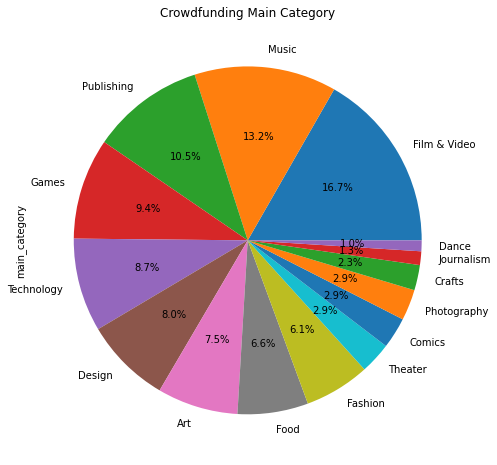

In [12]:
main_cat.plot(kind='pie', figsize=[16, 8], autopct='%1.1f%%', title="Crowdfunding Main Category")

The variables of category and the total of each variable respectively

In [13]:
df_clean['category'].value_counts()

Product Design     22310
Documentary        16138
Tabletop Games     14178
Music              13340
Shorts             12357
                   ...  
Residencies           69
Letterpress           49
Chiptune              35
Literary Spaces       27
Taxidermy             13
Name: category, Length: 159, dtype: int64

Since a lot of variables in category are hidden, we could check the list and the total of each variable separately.

In [14]:
#Checking the variables
df_clean['category'].tolist()

['Poetry',
 'Narrative Film',
 'Narrative Film',
 'Music',
 'Film & Video',
 'Restaurants',
 'Food',
 'Drinks',
 'Product Design',
 'Documentary',
 'Nonfiction',
 'Indie Rock',
 'Crafts',
 'Games',
 'Tabletop Games',
 'Design',
 'Comic Books',
 'Art Books',
 'Music',
 'Food',
 'Fashion',
 'Childrenswear',
 'Theater',
 'Drinks',
 'Comics',
 'Music',
 'DIY',
 'Webseries',
 'Comics',
 'Animation',
 'Food Trucks',
 'Product Design',
 'Product Design',
 'Public Art',
 'Music',
 'Webseries',
 'Indie Rock',
 'Documentary',
 'Illustration',
 'Indie Rock',
 'Nonfiction',
 'Music',
 'Photography',
 'Tabletop Games',
 'Pop',
 'Documentary',
 'Restaurants',
 'Narrative Film',
 'Tabletop Games',
 'Public Art',
 'Narrative Film',
 'People',
 'Art',
 'Photography',
 'Family',
 'Food Trucks',
 'Fiction',
 'Film & Video',
 'Webseries',
 'Tabletop Games',
 'Documentary',
 'Accessories',
 'Art',
 'Drinks',
 'Rock',
 'Hardware',
 'Theater',
 'Software',
 'Design',
 'Weaving',
 'Gadgets',
 'Web',
 'Jazz',


In [15]:
#Checking the total of each variables
df_clean['category'].value_counts().tolist()

[22310,
 16138,
 14178,
 13340,
 12357,
 11828,
 11492,
 9224,
 9168,
 8554,
 8317,
 8253,
 7165,
 7056,
 6927,
 6758,
 6756,
 6345,
 5762,
 5752,
 5657,
 5525,
 5186,
 5153,
 4996,
 4664,
 4451,
 4199,
 3911,
 3662,
 3350,
 3293,
 3225,
 3175,
 3162,
 3077,
 3046,
 2965,
 2818,
 2757,
 2743,
 2676,
 2613,
 2541,
 2496,
 2422,
 2321,
 2320,
 2178,
 2170,
 2154,
 2102,
 2002,
 1864,
 1850,
 1810,
 1808,
 1789,
 1752,
 1747,
 1580,
 1378,
 1369,
 1346,
 1286,
 1265,
 1239,
 1233,
 1173,
 1167,
 1154,
 1103,
 1092,
 1050,
 1030,
 1015,
 1013,
 931,
 924,
 923,
 916,
 913,
 902,
 864,
 841,
 839,
 821,
 817,
 784,
 775,
 760,
 746,
 744,
 740,
 739,
 726,
 717,
 709,
 682,
 669,
 648,
 588,
 574,
 572,
 540,
 483,
 482,
 458,
 429,
 428,
 428,
 426,
 424,
 416,
 410,
 398,
 391,
 345,
 336,
 330,
 329,
 323,
 317,
 305,
 298,
 289,
 285,
 278,
 276,
 275,
 268,
 255,
 250,
 238,
 238,
 232,
 231,
 221,
 219,
 196,
 194,
 190,
 181,
 164,
 162,
 153,
 139,
 138,
 137,
 113,
 108,
 100,
 93,

Crowdfunding State

In [16]:
state = df_clean['state'].value_counts()
state

failed        197611
successful    133851
canceled       38757
live            2798
suspended       1843
Name: state, dtype: int64

Plotting the Percentage of Crowdfunding State

<AxesSubplot:title={'center':'Crowdfunding State'}, ylabel='state'>

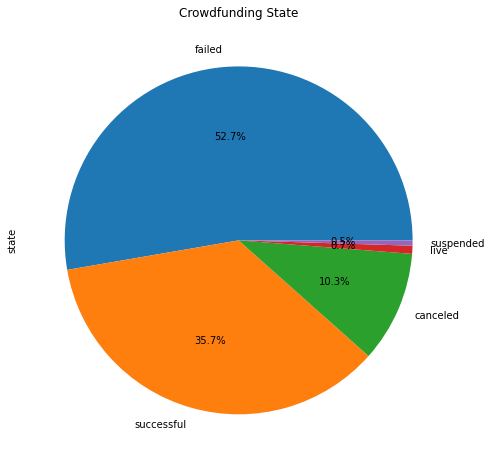

In [17]:
state.plot(kind='pie', figsize=[16, 8], autopct='%1.1f%%', title="Crowdfunding State")

Successful Main Category

In [18]:
successful = df_clean[(df_clean['state']=='successful')]
main_cat_success = successful['main_category'].value_counts()
main_cat_success

Music           24105
Film & Video    23612
Games           12518
Publishing      12300
Art             11510
Design          10549
Theater          6534
Technology       6433
Food             6085
Comics           5842
Fashion          5593
Photography      3305
Dance            2338
Crafts           2115
Journalism       1012
Name: main_category, dtype: int64

Plotting the Percentage of Successful Main Category

<AxesSubplot:title={'center':'Successful Main Category'}, ylabel='main_category'>

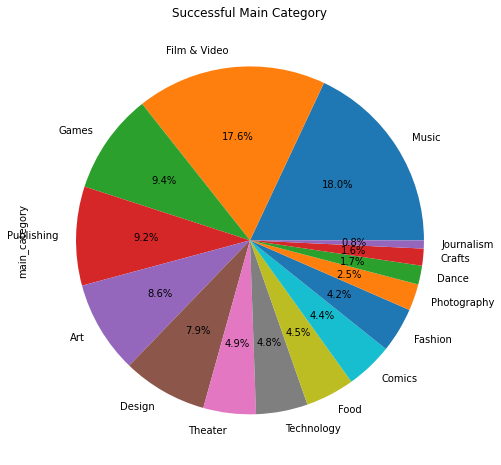

In [19]:
main_cat_success.plot(kind='pie', figsize=[16, 8], autopct='%1.1f%%', title="Successful Main Category")

Failed Main Category

In [20]:
failed = df_clean[(df_clean['state']=='failed')]
main_cat_failed = failed['main_category'].value_counts()
main_cat_failed

Film & Video    32891
Publishing      23113
Music           21696
Technology      20613
Games           16002
Food            15969
Design          14814
Fashion         14181
Art             14130
Photography      6384
Crafts           5703
Comics           4036
Theater          3708
Journalism       3136
Dance            1235
Name: main_category, dtype: int64

Plotting the Percentage of Failed Main Category

<AxesSubplot:title={'center':'Failed Main Category'}, ylabel='main_category'>

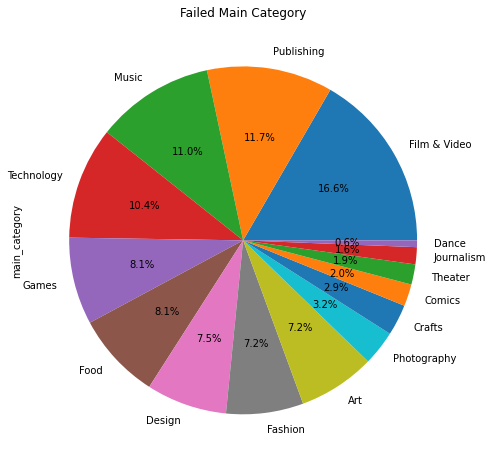

In [21]:
main_cat_failed.plot(kind='pie', figsize=[16, 8], autopct='%1.1f%%', title="Failed Main Category")

Countries which contributed in the crowdfunding 

In [22]:
countries = df_clean['country'].value_counts()
countries

US    292624
GB     33671
CA     14756
AU      7839
DE      4171
FR      2939
IT      2878
NL      2868
ES      2276
SE      1757
MX      1752
NZ      1447
DK      1113
IE       811
CH       761
NO       708
HK       618
BE       617
AT       597
SG       555
LU        62
JP        40
Name: country, dtype: int64

The percentages of countries which contributed in the crowdfunding 

<AxesSubplot:title={'center':'Participant Countries'}, ylabel='country'>

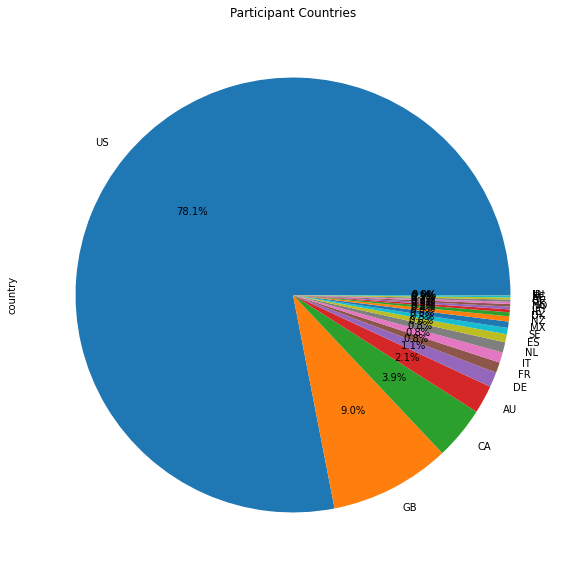

In [23]:
countries.plot(kind='pie', figsize=[20, 10], autopct='%1.1f%%', title="Participant Countries")

Sucessful Main Category in US

In [24]:
success_us = df_clean.query("state == 'successful' & country =='US'")
success_cat_us = success_us["main_category"].value_counts()
success_cat_us

Music           21718
Film & Video    19782
Publishing       9965
Art              9496
Games            9356
Design           7681
Food             5350
Theater          5221
Comics           4820
Technology       4723
Fashion          4120
Photography      2541
Dance            2088
Crafts           1640
Journalism        798
Name: main_category, dtype: int64

The Percentage of Successful Main Category in US

<AxesSubplot:title={'center':'Successful Main Category in US'}, ylabel='main_category'>

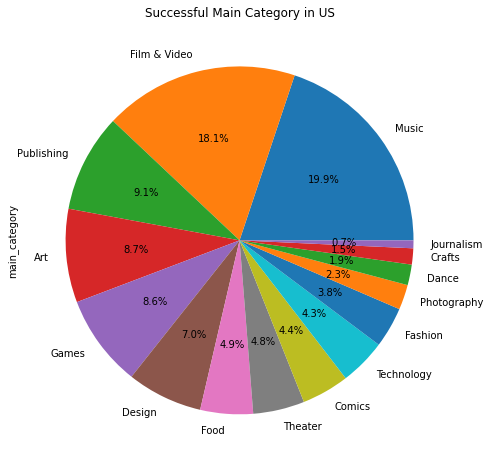

In [25]:
success_cat_us.plot(kind='pie', figsize=[16, 8], autopct='%1.1f%%', title="Successful Main Category in US")

Failed Main Category in US

In [26]:
failed_us = df_clean.query("state == 'failed' & country =='US'")
failed_cat_us = failed_us["main_category"].value_counts()
failed_cat_us

Film & Video    27150
Publishing      18712
Music           18507
Technology      13335
Food            12683
Art             10952
Games           10873
Design          10804
Fashion         10416
Photography      4688
Crafts           4323
Comics           3339
Theater          2973
Journalism       2311
Dance             993
Name: main_category, dtype: int64

The Percentage of Failed Main Category in US

<AxesSubplot:title={'center':'Failed Main Category in US'}, ylabel='main_category'>

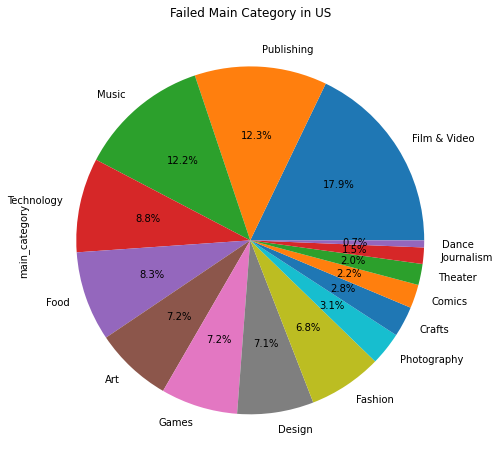

In [27]:
failed_cat_us.plot(kind='pie', figsize=[16, 8], autopct='%1.1f%%', title="Failed Main Category in US")

# VI. Measure of Central Tendency

Based on data exploration, we have a curiosity to know the reasons why 'film and video' and 'music' are the most successful categories in the most contributing country (US) for crowdfunding projects. Hence, we choose ‘film and video’ and ‘music’ in the US to compare based on the funding they received during crowdfunding.

Querying for 'film and video' and 'music' in the US

In [28]:
best2_cat_us = success_us.query("main_category == 'Film & Video' | main_category =='Music'") 
best2_cat_us

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real
11,100005484,Lisa Lim New CD!,Indie Rock,Music,USD,2013-04-08,12500.0,2013-03-09 06:42:58,12700.00,successful,100,US,12700.0,12700.00,12500.0
18,1000070642,Mike Corey's Darkness & Light Album,Music,Music,USD,2012-08-17,250.0,2012-08-02 14:11:32,250.00,successful,7,US,250.0,250.00,250.0
25,1000102741,Matt Cavenaugh & Jenny Powers make their 1st a...,Music,Music,USD,2011-01-06,10000.0,2010-12-07 23:16:50,15827.00,successful,147,US,15827.0,15827.00,10000.0
29,100011318,My Moon - Animated Short Film,Animation,Film & Video,USD,2017-05-03,50000.0,2017-04-03 17:11:33,57577.31,successful,840,US,10120.0,57577.31,50000.0
34,100012079,Chris Eger Band - New Nashville Record!,Music,Music,USD,2014-08-13,12000.0,2014-07-14 22:35:51,13260.00,successful,92,US,13260.0,13260.00,12000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378614,999763489,Kronos: Under 30 Project / #5,Classical Music,Music,USD,2012-02-01,10000.0,2011-12-12 21:19:01,12300.00,successful,162,US,12300.0,12300.00,10000.0
378617,99977482,Language of Love - a new CD from Lisa Deveaux,Indie Rock,Music,USD,2011-04-05,5000.0,2011-02-03 05:21:45,5025.00,successful,31,US,5025.0,5025.00,5000.0
378622,999799441,The Hollywood Kills On Tour,Rock,Music,USD,2012-05-04,10000.0,2012-03-05 23:12:03,10300.00,successful,78,US,10300.0,10300.00,10000.0
378623,999800713,BETTER DESPERATE,Music Videos,Film & Video,USD,2016-05-07,300.0,2016-04-07 20:04:26,300.00,successful,5,US,300.0,300.00,300.0


Checking the statistical value of 'Film & Video' and 'Music' before we calculate the measure of central tendency

In [29]:
best2_cat_us.describe()

,ID,goal,pledged,backers,usd_pledged,usd_pledged_real,usd_goal_real
count,4.150000e+04,4.150000e+04,4.150000e+04,41500.000000,4.150000e+04,4.150000e+04,4.150000e+04
mean,1.074328e+09,8.715629e+03,1.100114e+04,130.782554,9.819453e+03,1.100114e+04,8.715629e+03
std,6.181617e+08,2.627264e+04,5.165063e+04,685.655890,5.051545e+04,5.165063e+04,2.627264e+04
min,3.940900e+04,1.000000e+00,1.000000e+00,1.000000,0.000000e+00,1.000000e+00,1.000000e+00
25%,5.399296e+08,1.625000e+03,2.071000e+03,31.000000,1.540000e+03,2.071000e+03,1.625000e+03
50%,1.076343e+09,4.000000e+03,4.948280e+03,61.000000,4.001000e+03,4.948280e+03,4.000000e+03
75%,1.607045e+09,9.997500e+03,1.041300e+04,118.000000,9.533955e+03,1.041300e+04,9.997500e+03
max,2.147472e+09,2.000000e+06,5.764229e+06,91585.000000,5.764229e+06,5.764229e+06,2.000000e+06


Query for successful 'Film & Video' in the US

In [30]:
suc_film_video_us = success_us.query("main_category == 'Film & Video'")
suc_film_video_us.head(5)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real
29,100011318,My Moon - Animated Short Film,Animation,Film & Video,USD,2017-05-03,50000.0,2017-04-03 17:11:33,57577.31,successful,840,US,10120.00,57577.31,50000.0
37,1000132945,Zen in America: a film on Zen Buddhism in Nort...,Documentary,Film & Video,USD,2013-10-21,10000.0,2013-09-21 23:00:54,15663.00,successful,213,US,15663.00,15663.00,10000.0
47,1000184224,Star and the Snowman,Narrative Film,Film & Video,USD,2013-02-23,8000.0,2013-01-24 06:04:05,9401.00,successful,154,US,9401.00,9401.00,8000.0
50,1000201265,I'LL SEE YOU IN MY DREAMS - narrative feature ...,Narrative Film,Film & Video,USD,2014-02-05,60000.0,2014-01-11 00:57:14,61365.16,successful,632,US,61365.16,61365.16,60000.0
54,1000216800,Mothers Into Living Fit Yoga DVD for Moms and ...,Family,Film & Video,USD,2014-06-19,11000.0,2014-05-20 17:18:29,11055.00,successful,51,US,11055.00,11055.00,11000.0


Query for successful 'Music' in the US

In [31]:
suc_music_us = success_us.query("main_category == 'Music'")
suc_music_us.head(5)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real
11,100005484,Lisa Lim New CD!,Indie Rock,Music,USD,2013-04-08,12500.0,2013-03-09 06:42:58,12700.00,successful,100,US,12700.00,12700.00,12500.0
18,1000070642,Mike Corey's Darkness & Light Album,Music,Music,USD,2012-08-17,250.0,2012-08-02 14:11:32,250.00,successful,7,US,250.00,250.00,250.0
25,1000102741,Matt Cavenaugh & Jenny Powers make their 1st a...,Music,Music,USD,2011-01-06,10000.0,2010-12-07 23:16:50,15827.00,successful,147,US,15827.00,15827.00,10000.0
34,100012079,Chris Eger Band - New Nashville Record!,Music,Music,USD,2014-08-13,12000.0,2014-07-14 22:35:51,13260.00,successful,92,US,13260.00,13260.00,12000.0
36,1000131947,Arrows & Sound Debut Album,Indie Rock,Music,USD,2012-05-19,4000.0,2012-04-19 01:04:31,8641.34,successful,157,US,8641.34,8641.34,4000.0


VI.1. Mean

The average of successful funding for Film & Video and Music in the US

In [72]:
print("The average of successful funding for Film & Video in the US:")
CT1 = ['goal','pledged','backers','usd_pledged','usd_pledged_real','usd_goal_real']
for col in CT1:
    print ('Mean ' + suc_film_video_us[col].name + ' = ' + str(suc_film_video_us[col].mean()))

print("-"*60)

print("The average of successful funding for Music in the US:")
CT2 = ['goal','pledged','backers','usd_pledged','usd_pledged_real','usd_goal_real']
for col in CT2:
    print ('Mean ' + suc_music_us[col].name + ' = ' + str(suc_music_us[col].mean()))

The average of successful funding for Film & Video in the US:
Mean goal = 11871.892955717318
Mean pledged = 14865.630767869781
Mean backers = 160.31210191082803
Mean usd_pledged = 13447.179383783237
Mean usd_pledged_real = 14865.630767869781
Mean usd_goal_real = 11871.892955717318
------------------------------------------------------------
The average of successful funding for Music in the US:
Mean goal = 5840.722932590477
Mean pledged = 7481.140028547749
Mean backers = 103.88534855879915
Mean usd_pledged = 6515.111422782945
Mean usd_pledged_real = 7481.140028547749
Mean usd_goal_real = 5840.722932590477


VI.2. Median 

The median of successful funding for Film & Video and Music in the US

In [63]:
print("The median of successful funding for Film & Video in the US:")
CT3 = ['goal','pledged','backers','usd_pledged','usd_pledged_real','usd_goal_real']
for col in CT3:
    print ('Median ' + suc_film_video_us[col].name + ' = ' + str(suc_film_video_us[col].median()))

print("-"*60)

print("The median of successful funding for Music in the US:")
CT4 = ['goal','pledged','backers','usd_pledged','usd_pledged_real','usd_goal_real']
for col in CT4:
    print ('Median ' + suc_music_us[col].name + ' = ' + str(suc_music_us[col].median()))

The median of successful funding for Film & Video in the US:
Median goal = 5000.0
Median pledged = 5501.965
Median backers = 61.0
Median usd_pledged = 5032.0
Median usd_pledged_real = 5501.965
Median usd_goal_real = 5000.0
------------------------------------------------------------
The median of successful funding for Music in the US:
Median goal = 3500.0
Median pledged = 4075.0
Median backers = 60.0
Median usd_pledged = 3385.5
Median usd_pledged_real = 4075.0
Median usd_goal_real = 3500.0


VI.3. Mode

The mode of successful funding for Film & Video and Music in the US

In [64]:
print("The mode of successful funding for Film & Video in the US:")
CT5 = ['goal','pledged','backers','usd_pledged','usd_pledged_real','usd_goal_real']
for col in CT5:
    print ('Mode ' + suc_film_video_us[col].name + ' = ' + str(suc_film_video_us[col].mode()))

print("-"*60)

print("The mode of successful funding for Music in the US:")
CT6 = ['goal','pledged','backers','usd_pledged','usd_pledged_real','usd_goal_real']
for col in CT6:
    print ('Mode ' + suc_music_us[col].name + ' = ' + str(suc_music_us[col].mode()))

The mode of successful funding for Film & Video in the US:
Mode goal = 0    5000.0
dtype: float64
Mode pledged = 0    1000.0
dtype: float64
Mode backers = 0    21
dtype: int64
Mode usd_pledged = 0    0.0
dtype: float64
Mode usd_pledged_real = 0    1000.0
dtype: float64
Mode usd_goal_real = 0    5000.0
dtype: float64
------------------------------------------------------------
The mode of successful funding for Music in the US:
Mode goal = 0    5000.0
dtype: float64
Mode pledged = 0    1000.0
dtype: float64
Mode backers = 0    34
dtype: int64
Mode usd_pledged = 0    0.0
dtype: float64
Mode usd_pledged_real = 0    1000.0
dtype: float64
Mode usd_goal_real = 0    5000.0
dtype: float64


# VII. Measure of Variance

VII.1. Variance 

The variance of successful funding for Film & Video and Music in the US

In [65]:
print("The variance of successful funding for Film & Video in the US:")
CT7 = ['goal','pledged','backers','usd_pledged','usd_pledged_real','usd_goal_real']
for col in CT7:
    print ('Variance ' + suc_film_video_us[col].name + ' = ' + str(suc_film_video_us[col].var()))

print("-"*60)

print("The variance of successful funding for Music in the US:")
CT8 = ['goal','pledged','backers','usd_pledged','usd_pledged_real','usd_goal_real']
for col in CT8:
    print ('Variance ' + suc_music_us[col].name + ' = ' + str(suc_music_us[col].var()))

The variance of successful funding for Film & Video in the US:
Variance goal = 1348275117.3922086
Variance pledged = 5193190569.815035
Variance backers = 892032.8055751886
Variance usd_pledged = 5072933938.344835
Variance usd_pledged_real = 5193190569.815035
Variance usd_goal_real = 1348275117.3922086
------------------------------------------------------------
The variance of successful funding for Music in the US:
Variance goal = 73580393.47065094
Variance pledged = 341644407.1255024
Variance backers = 84330.84894404896
Variance usd_pledged = 232647261.61182016
Variance usd_pledged_real = 341644407.1255024
Variance usd_goal_real = 73580393.47065094


VII.2. Standard Deviation

The standard deviation of successful funding for Film & Video and Music in the US

In [66]:
print("The standard deviation of successful funding for Film & Video in the US:")
CT9 = ['goal','pledged','backers','usd_pledged','usd_pledged_real','usd_goal_real']
for col in CT9:
    print ('Standard deviation ' + suc_film_video_us[col].name + ' = ' + str(suc_film_video_us[col].std()))

print("-"*60)

print("The standard deviation of successful funding for Music in the US:")
CT10 = ['goal','pledged','backers','usd_pledged','usd_pledged_real','usd_goal_real']
for col in CT10:
    print ('Standard deviation ' + suc_music_us[col].name + ' = ' + str(suc_music_us[col].std()))

The standard deviation of successful funding for Film & Video in the US:
Standard deviation goal = 36718.865960051226
Standard deviation pledged = 72063.7951388562
Standard deviation backers = 944.4748835068027
Standard deviation usd_pledged = 71224.53185767411
Standard deviation usd_pledged_real = 72063.7951388562
Standard deviation usd_goal_real = 36718.865960051226
------------------------------------------------------------
The standard deviation of successful funding for Music in the US:
Standard deviation goal = 8577.9014607683
Standard deviation pledged = 18483.625378304507
Standard deviation backers = 290.39774266348724
Standard deviation usd_pledged = 15252.77881606562
Standard deviation usd_pledged_real = 18483.625378304507
Standard deviation usd_goal_real = 8577.9014607683


VII.3. Range

The range of successful funding for Film & Video and Music in the US

In [68]:
print("The range of successful funding for Film & Video in the US:")
CT11 = ['goal','pledged','backers','usd_pledged','usd_pledged_real','usd_goal_real']
for col in CT11:
    print ('Range ' + suc_film_video_us[col].name + ' = ' + str(suc_film_video_us[col].max() - suc_film_video_us[col].min()))

print("-"*60)

print("The range of successful funding for Music in the US:")
CT12 = ['goal','pledged','backers','usd_pledged','usd_pledged_real','usd_goal_real']
for col in CT12:
    print ('Range ' + suc_music_us[col].name + ' = ' + str(suc_music_us[col].max() - suc_music_us[col].min()))

The range of successful funding for Film & Video in the US:
Range goal = 1999999.0
Range pledged = 5764228.38
Range backers = 91584
Range usd_pledged = 5764229.38
Range usd_pledged_real = 5764228.38
Range usd_goal_real = 1999999.0
------------------------------------------------------------
The range of successful funding for Music in the US:
Range goal = 249999.0
Range pledged = 1363035.89
Range backers = 24882
Range usd_pledged = 1192793.11
Range usd_pledged_real = 1363035.89
Range usd_goal_real = 249999.0


VII.4. Confidence Interval

Confidence Interval for successful Film & Video in the US using 'usd_pledged_real'

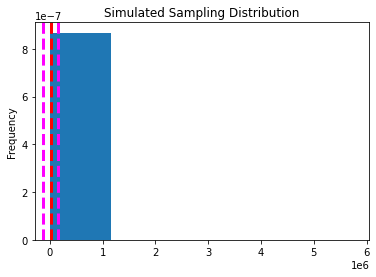

Sampling Mean: 14865.630767869781
Sampling Standard Error: 72063.7951388562
Confidence Interval of 95%: (-126376.81229356102, 156108.07382930059)


In [38]:
# CI for Film and Video in the US using 'usd_pledged_real'
F_V_pledged_real = suc_film_video_us['usd_pledged_real']
m = F_V_pledged_real.mean()
sd = F_V_pledged_real.std()
ci = stats.norm.interval(0.95, m, sd)

# Plot the distribution, mean, and CI
F_V_pledged_real.plot.hist(title='Simulated Sampling Distribution', bins=5, density=True) 
plt.axvline(m, color='red', linestyle='dashed', linewidth=3)
plt.axvline(ci[0], color='magenta', linestyle='dashed', linewidth=3)
plt.axvline(ci[1], color='magenta', linestyle='dashed', linewidth=3)
plt.show()

# Print the Mean, StdDev and 95% CI
print ('Sampling Mean: ' + str(m))
print ('Sampling Standard Error: ' + str(sd))
print ('Confidence Interval of 95%: ' + str(ci))


Confidence Interval for successful Music in the US using 'usd_pledged_real'

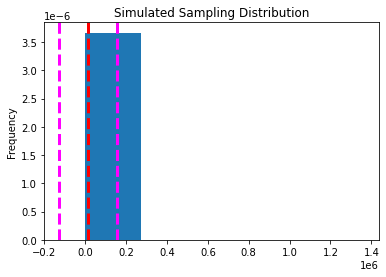

Sampling Mean: 14865.630767869781
Sampling Standard Error: 72063.7951388562
Confidence Interval of 95%: (-126376.81229356102, 156108.07382930059)


In [39]:
# CI for Music in the US using 'usd_pledged_real'
M_pledged_real = suc_music_us['usd_pledged_real']
m = F_V_pledged_real.mean()
sd = F_V_pledged_real.std()
ci = stats.norm.interval(0.95, m, sd)

# Plot the distribution, mean, and CI
M_pledged_real.plot.hist(title='Simulated Sampling Distribution', bins=5, density=True) 
plt.axvline(m, color='red', linestyle='dashed', linewidth=3)
plt.axvline(ci[0], color='magenta', linestyle='dashed', linewidth=3)
plt.axvline(ci[1], color='magenta', linestyle='dashed', linewidth=3)
plt.show()

# Print the Mean, StdDev and 95% CI
print ('Sampling Mean: ' + str(m))
print ('Sampling Standard Error: ' + str(sd))
print ('Confidence Interval of 95%: ' + str(ci))


# VIII. Hypothesis Testing
In the hypothesis testing, we compare the diffenrence between sucessful ‘Film & Video’ and ‘Music’ in the US based on the funding they actually received (usd_pledged_real). We will test the null hypothesis with the assumption that the significance level is 5% and the method we use is two samples independend two tails.
 
H0: μ Successful Film & Video in the US = μ Successful Music in the US
 
H1: μ Successful Film & Video in the US != μ Successful Music in the US

Mean for Successful 'Film & Video' and 'Music' in the US

In [51]:
sum_film_video = suc_film_video_us['usd_pledged_real']
sum_music = suc_music_us['usd_pledged_real']

print("The average of successful funding recieved for Film & Video in the US : ", round(sum_film_video.mean()))
print("The average of successful funding recieved for Music in the US : ", round(sum_music.mean()))

The average of successful funding recieved for Film & Video in the US :  14866
The average of successful funding recieved for Music in the US :  7481


Calculate P-value and T-statistics

In [59]:
t_stat, p_val = stats.ttest_ind(sum_film_video, sum_music)
print('P-value:',str(p_val)) #the p-value isn't divided by 2 since the output is two-sided p-value
print('T-statistics:', str(t_stat))

P-value: 4.68441949331509e-48
T-statistics: 14.583801496898193


Visualisation of hypothesis testing

C:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


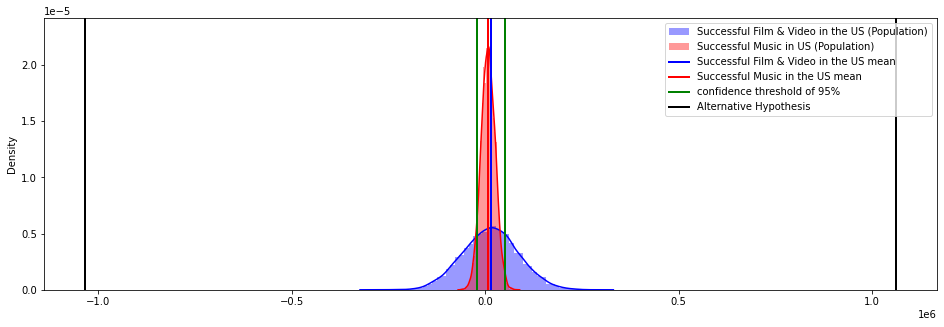

In [73]:
film_video_pop = np.random.normal(sum_film_video.mean(), sum_film_video.std(),10000)
music_pop = np.random.normal(sum_music.mean(),sum_music.std(),10000)

ci = stats.norm.interval(0.95, sum_film_video.mean(), sum_music.std())
plt.figure(figsize=(16,5))
sns.distplot(film_video_pop, label='Successful Film & Video in the US (Population)',color='blue')
sns.distplot(music_pop, label='Successful Music in US (Population)',color='red')

plt.axvline(sum_film_video.mean(), color='blue', linewidth=2, label='Successful Film & Video in the US mean')
plt.axvline(sum_music.mean(), color='red',  linewidth=2, label='Successful Music in the US mean')

plt.axvline(ci[1], color='green', linestyle='-', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='-', linewidth=2)

plt.axvline(film_video_pop.mean()+t_stat*film_video_pop.std(), color='black', linestyle='-', linewidth=2, label = 'Alternative Hypothesis')
plt.axvline(film_video_pop.mean()-t_stat*film_video_pop.std(), color='black', linestyle='-', linewidth=2)

plt.legend()

Since the P-value is lesser than the significance level (0.05), we conclude that we reject the null hypothesis (H0) and accept the alternative hypothesis (H1). It could be implied that the difference between the funding received (usd_pledged_real) for successful Film & Video and Music in the US are significant.

# IX. Conclusion
1. Based on data exploration we could draw several conclusions as follows:
- In the crowdfunding main category, the top 3 main categories are Film & Video (16.7%), Music (13.2%) and Publishing (10.5%), while the lowest 3 main categories are Dance (1%), Journalism (1.3%), and Crafts (2.3%).
- The proportions of the crowdfunding state are failed (52.7%), successful (35.7%), canceled (10.3%), lived (0.7%), and suspended (0.5%).
- In the successful main category, the top 3 main categories are Music (18%), Film & Video (17.6%), and Games (9.4%), while the lowest 3 main categories are Journalism (0.8%), Crafts (1.6%), and Dance (1.7%).
- In the failed main categories, the top 3 main categories are Film & Video (16.6%), Publishing (11.7%), and Music (11%), while the lowest 3 main categories are Dance (0.6%), Journalism (1.6%), and theater (1.9%).
- The top 3 contributor countries in crowdfunding are the US (78.1%), the GB (9%), and the CA (3.9%).
- The top 3 successful main categories in the US are Music (19.9%), Film & Video (18.8%), and Publishing (9.1%), while the lowest 3 main categories are Journalism (0.7%), Craft (1.5%), and Dance (1.9%).
- The top 3 failed main categories in the US are Film & Video (17.9%), Publishing (12.3%), and Music (12.2%), while the lowest 3 main categories are Dance (0.7%), Journalism (1.5%), and Theater (2%).
2. Since the US is the biggest contributing country in the crowdfunding projects, in the Measure of Central Tendency, we focus on calculating the measure of Central Tendency for the top 2  successful main categories in the US which are Film & Video and Music. In the Measure Central of Tendency, we calculate the mean, median, and mode for values of goal, pledged, backers, usd pledged, usd pledged real, and usd goal real respectively.
3. In the Measure of Variance, we also focus on calculating the Measure of Variance for the top 2  successful main categories in the US which are Film & Video and Music.In the Measure of Variance, we calculate variance,  standard deviation and range for values of goal, pledged, backers, usd pledged, usd pledged real, and usd goal real respectively, while in the confidence interval, we calculate the successful Film & Video and Music in the US using usd pledged real (the funding they actually received).
4. In the hypothesis testing, we compare the difference between successful Film & Video and Music in the US based on the funding they actually received (usd_pledged_real) in which the H0: Successful Film & Video in the US = Successful Music in the US and H1: Successful Film & Video in the US  != Successful Music in the US. 
Based on the hypothesis testing calculation, we get that the P-value is lesser than the significance level (0.05),  as a result we conclude that we reject the null hypothesis and we accept the alternative hypothesis. It could be implied that the difference between the funding they actually received (usd_pledged_real) for successful Film & Video and Music in the US are significant.
 


